In [4]:
%cd ..

/home/zephy_manjaro/My-Workspace/Code/others/ai4vn2022-air-quality-forecasting


In [5]:
# Import relevant items
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline


In [6]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = [16,9]

In [7]:
df = pd.read_csv('data/raw/data-train/output/S0000339-Kim Ma.csv')


In [8]:
print(df.head())
print(df.columns)


   Unnamed: 0         timestamp  PM2.5  humidity  temperature
0           0  27/05/2020 12:00  15.34     60.52        31.34
1           1  27/05/2020 13:00  13.70     60.85        31.08
2           2  27/05/2020 14:00  20.90     65.86        30.32
3           3  27/05/2020 15:00  23.78     68.63        29.85
4           4  27/05/2020 16:00  25.29     68.48        29.96
Index(['Unnamed: 0', 'timestamp', 'PM2.5', 'humidity', 'temperature'], dtype='object')


In [9]:
df.dtypes


Unnamed: 0       int64
timestamp       object
PM2.5          float64
humidity       float64
temperature    float64
dtype: object

In [10]:
df['timestamp'] = pd.to_datetime(df['timestamp'])



## Visualize Features

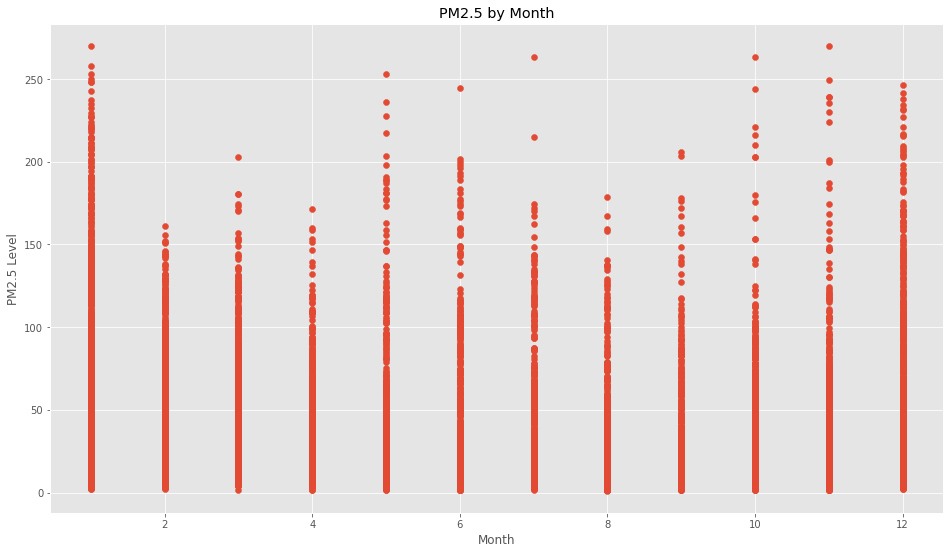

In [11]:
x = df['timestamp'].dt.month
y = df['PM2.5']

plt.scatter(x, y)
plt.xlabel('Month')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Month')
plt.show()



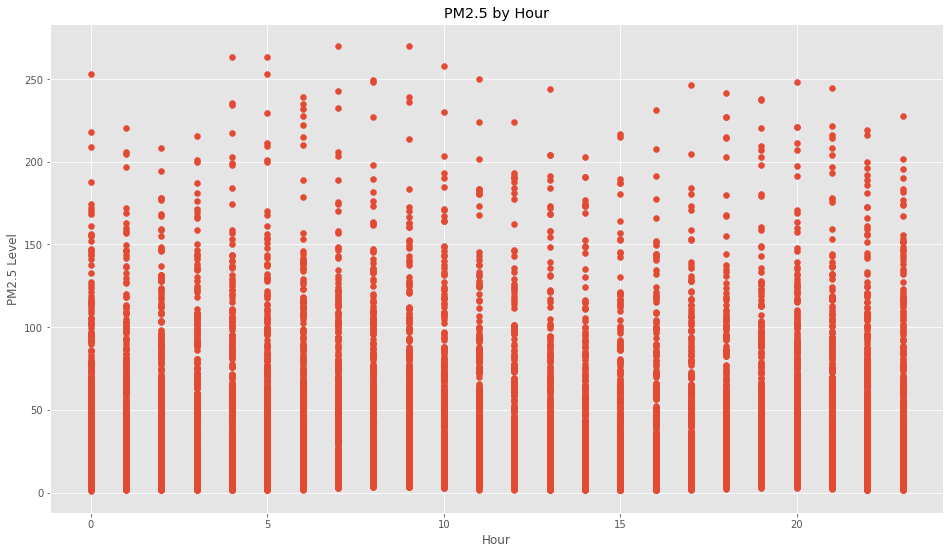

In [12]:
x = df['timestamp'].dt.hour
y = df['PM2.5']

plt.scatter(x, y)
plt.xlabel('Hour')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Hour')
plt.show()


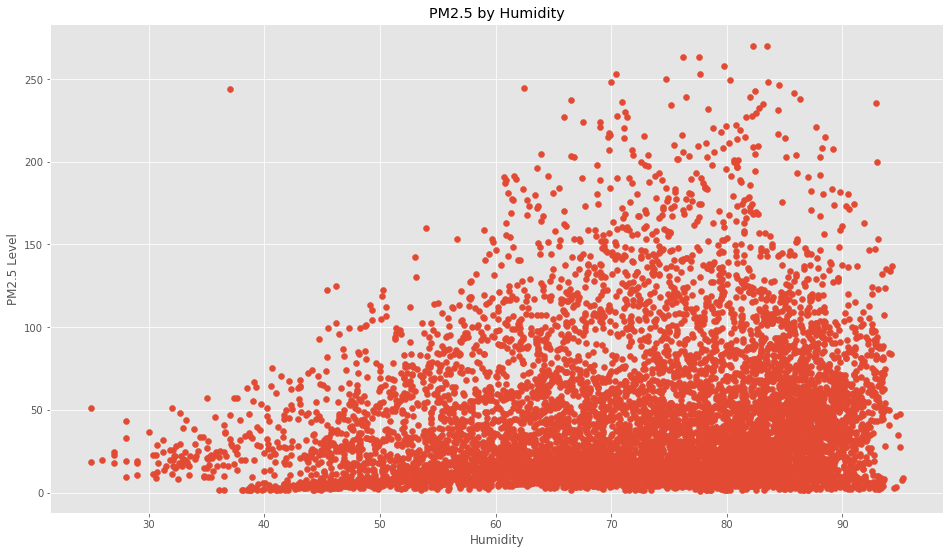

In [13]:
x = df['humidity']
y = df['PM2.5']

plt.scatter(x, y)
plt.xlabel('Humidity')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Humidity')
plt.show()


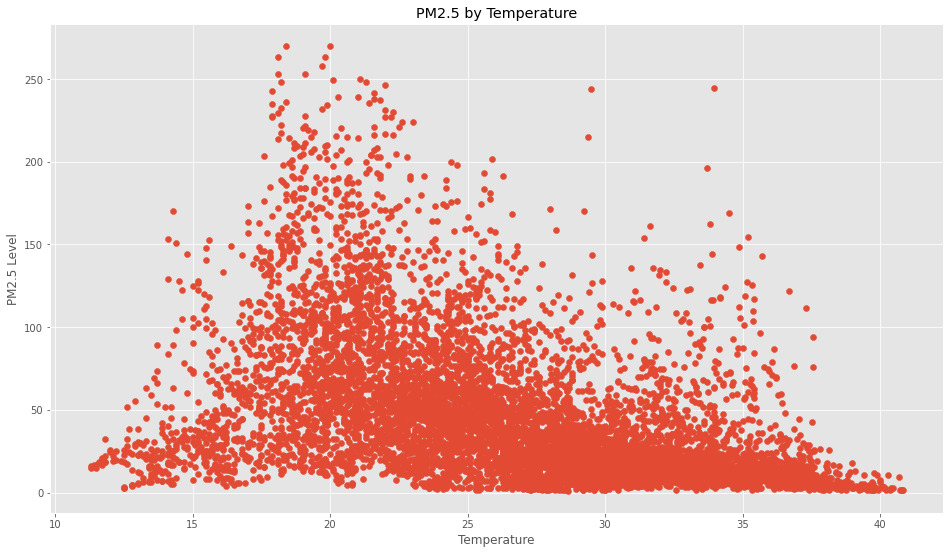

In [14]:
x = df['temperature']
y = df['PM2.5']

plt.scatter(x, y)
plt.xlabel('Temperature')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Temperature')
plt.show()


In [15]:
def time_series(start, end):
    time_series_df = df
    time_series_df =  time_series_df[['timestamp', 'PM2.5']][(
        time_series_df['timestamp'] >= start) & (time_series_df['timestamp'] <= end)]
    x = time_series_df['timestamp']
    y = time_series_df['PM2.5']

    plt.plot(x, y)
    plt.xlabel('Time')
    plt.ylabel('PM2.5 Value')
    plt.title('PM2.5 Time Series')
    return plt.show()


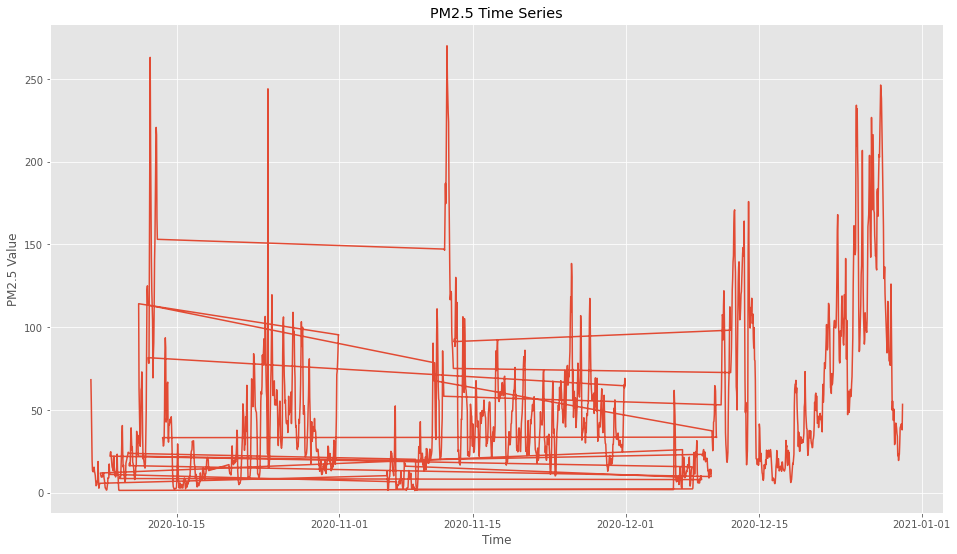

In [35]:
time_series('2020-10-01','2020-12-30')

### Handle NaNs

1. Check if there is NaN value

In [17]:
df.isnull().values.any()

True

In [18]:
df.describe()

,Unnamed: 0,PM2.5,humidity,temperature
count,9000.000000,8806.000000,8807.000000,8807.000000
mean,4499.500000,44.315294,72.437441,26.719486
std,2598.220545,42.211868,13.243081,5.767482
min,0.000000,1.230000,25.000000,11.300000
25%,2249.750000,13.900000,64.000000,22.400000
50%,4499.500000,29.745000,74.600000,27.000000
75%,6749.250000,61.100000,83.100000,31.100000
max,8999.000000,270.000000,95.200000,40.820000


2. Show rows where any cell has a NaN

In [19]:

df[df.isnull().any(axis=1)].shape


(194, 5)

In [20]:
df.shape

(9000, 5)

3. Drop any row where Value is NaN

In [21]:
df[df['PM2.5'].isnull()]


,Unnamed: 0,timestamp,PM2.5,humidity,temperature
1960,1960,2020-08-17 04:00:00,NaN,87.75,27.35
2549,2549,2020-10-09 17:00:00,NaN,NaN,NaN
2550,2550,2020-10-09 18:00:00,NaN,NaN,NaN
2551,2551,2020-10-09 19:00:00,NaN,NaN,NaN
2552,2552,2020-10-09 20:00:00,NaN,NaN,NaN
...,...,...,...,...,...
8451,8451,2021-05-14 15:00:00,NaN,NaN,NaN
8452,8452,2021-05-14 16:00:00,NaN,NaN,NaN
8933,8933,2021-03-06 17:00:00,NaN,NaN,NaN
8934,8934,2021-03-06 18:00:00,NaN,NaN,NaN


In [22]:
df = df.dropna(axis=0, subset=['PM2.5'])
df.shape


(8806, 5)

4. Reset index

In [23]:
# Remove first column
df = df.iloc[:, 1:]


In [24]:
df = df.reset_index(drop=True)


In [25]:
df.head(5)

,timestamp,PM2.5,humidity,temperature
0,2020-05-27 12:00:00,15.34,60.52,31.34
1,2020-05-27 13:00:00,13.70,60.85,31.08
2,2020-05-27 14:00:00,20.90,65.86,30.32
3,2020-05-27 15:00:00,23.78,68.63,29.85
4,2020-05-27 16:00:00,25.29,68.48,29.96


### Visualizing cleaned features & correlation

Pair Scatter

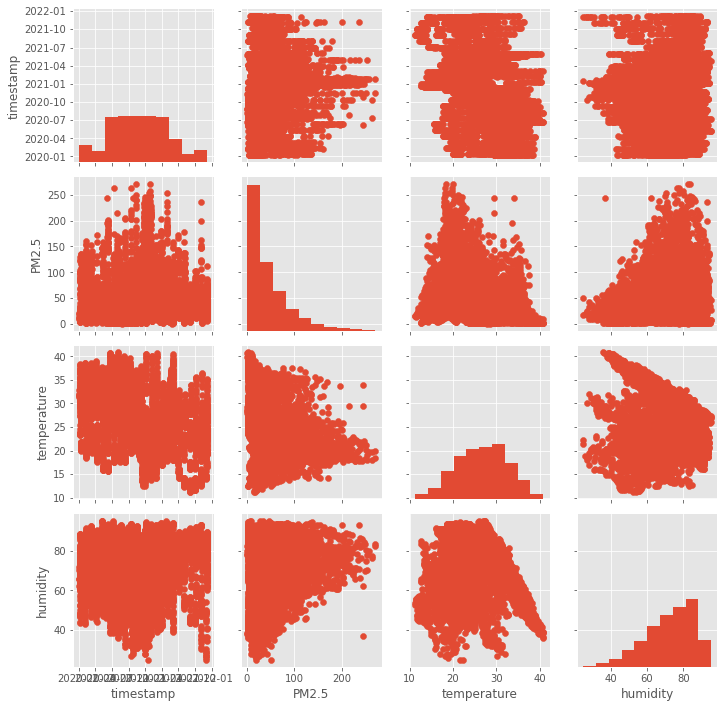

In [26]:
g = sns.PairGrid(df, vars=["timestamp", "PM2.5", "temperature",
                 "humidity"], dropna=True)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)


In [27]:
# Clone df with more feature of year, month, day, hour
_df = pd.concat([
    df, df['timestamp'].dt.year,
    df['timestamp'].dt.month,
    df['timestamp'].dt.day,
    df['timestamp'].dt.hour], axis=1)

_df.columns = ['timestamp', 'PM2.5', 'humidity',
               'temperature',  'year', 'month', 'day', 'hour']


Visualize the distribution of PM2.5 value by month, hour

In [28]:
def visualize_distribution_featue(feature):
    g = sns.FacetGrid(_df, col=feature, col_wrap=4)
    g.map(sns.histplot, 'PM2.5')
    plt.show()


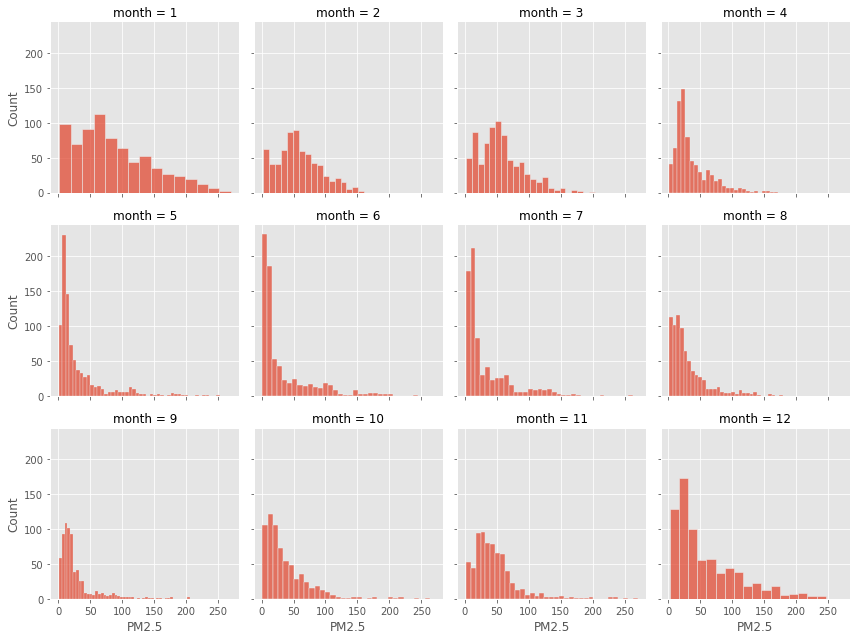

In [29]:
visualize_distribution_featue('month')

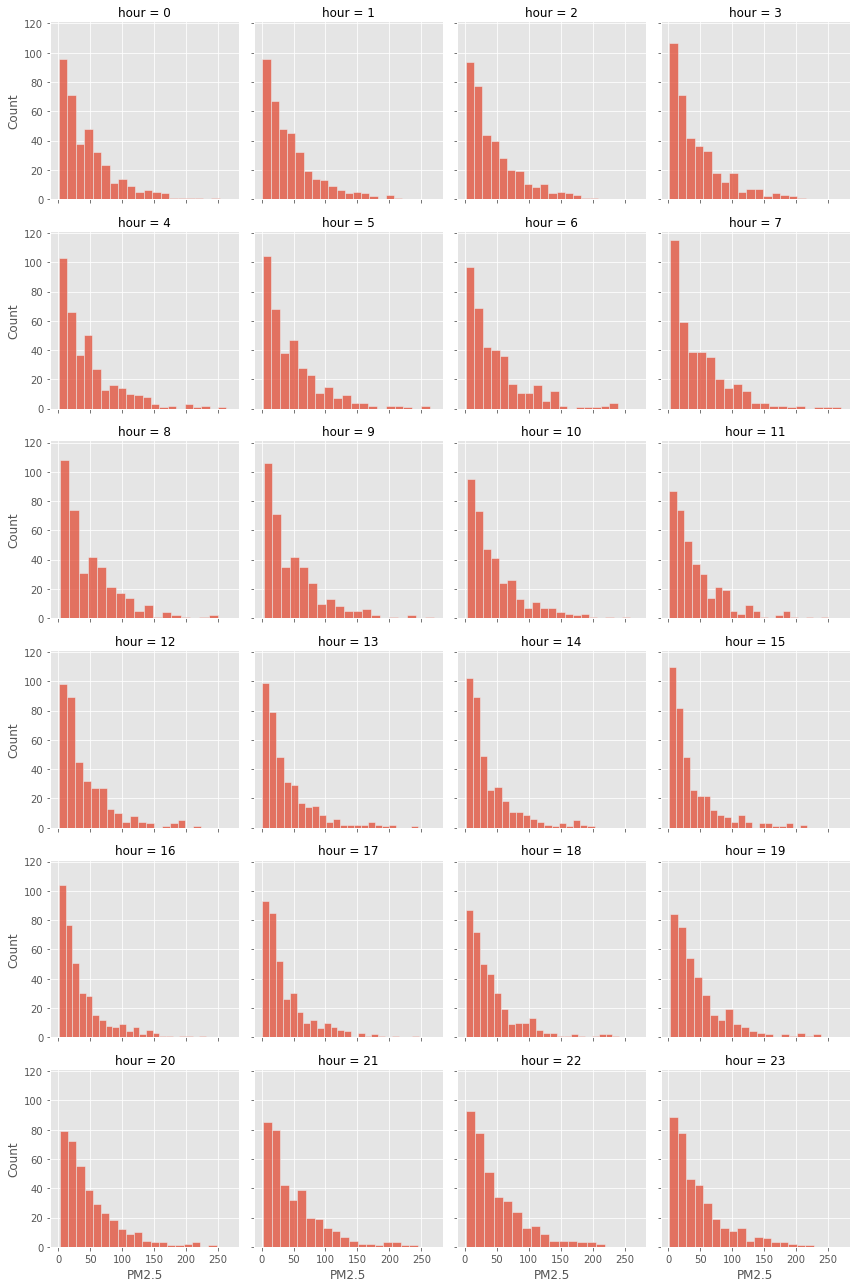

In [30]:
visualize_distribution_featue('hour')


Correlation

<AxesSubplot:>

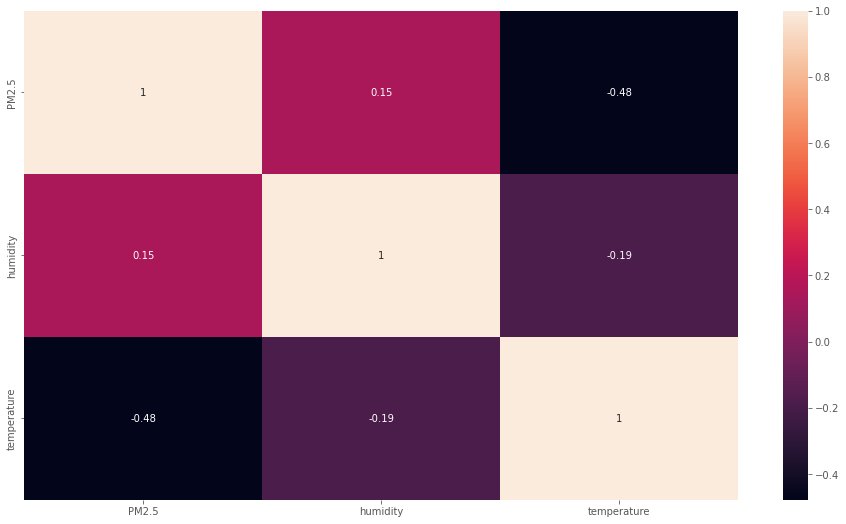

In [31]:
corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True)
